In [1]:
"""
The goal of this code is to provide a good offensive identity for every NBA player. It does so via KMeans and Spectral Clustering.
The NBA's play-type data provides a lot of information we can use to cluster together players.

Why is this valuable:
(1) From the perspective of the front office, it provides a great deal of statistical information on what other players on the market
may be able to fill in a hole created by a player leaving in free agency
(2) From the perspective of the coaching staff, it creates a frame of reference for the situations in which a player is best used

"""

"\nThe goal of this code is to provide a good offensive identity for every NBA player. It does so via KMeans and Spectral Clustering.\nThe NBA's play-type data provides a lot of information we can use to cluster together players.\n\nWhy is this valuable:\n(1) From the perspective of the front office, it provides a great deal of statistical information on what other players on the market\nmay be able to fill in a hole created by a player leaving in free agency\n(2) From the perspective of the coaching staff, it creates a frame of reference for the situations in which a player is best used\n\n"

In [2]:
#Mathematical tools
import matplotlib.pyplot as plt
from kneed import KneeLocator
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns

In [3]:
#Machine learning tools
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
#Read data into dataframe
raw_data = {}
raw_data["isolation"] = pd.read_csv("isolation.csv")
raw_data["cut"] = pd.read_csv("cut.csv")
raw_data["off_screen"] = pd.read_csv("OffScreen.csv")
raw_data["PnR_handler"] = pd.read_csv("PandRBallHandler.csv")
raw_data["PnR_roller"] = pd.read_csv("PandRRoller.csv")
raw_data["post_up"] = pd.read_csv("PostUp.csv")
raw_data["spot_up"] = pd.read_csv("SpotUp.csv")

players = {}
#Getting rid of NaN row, team name, and player name
for type in raw_data.keys():
    raw_data[type] = raw_data[type].drop([0, 0])
    raw_data[type] = raw_data[type].drop(columns=["TEAM"])
    players[type] = raw_data[type]["PLAYER"]
    raw_data[type] = raw_data[type].drop(columns=["PLAYER"])
    
    column_names = []
    for stat in raw_data[type].columns:
        column_names.append(stat + "_" + type)

    raw_data[type].columns = column_names
        

In [5]:
#Let's bring everything to the same scale before clustering.
normalized_data = {}
for key in raw_data.keys():
    normalized_data[key] = pd.DataFrame(StandardScaler().fit_transform(raw_data[key]))
    normalized_data[key] = pd.DataFrame(normalize(normalized_data[key]))

In [6]:
print(raw_data["isolation"].columns)

Index(['GP_isolation', 'POSS_isolation', 'FREQ%_isolation', 'PPP_isolation',
       'PTS_isolation', 'FGM_isolation', 'FGA_isolation', 'FG%_isolation',
       'EFG%_isolation', 'FT_isolation', 'TOV_isolation', 'SF_isolation',
       'AND ONE_isolation', 'SCORE_isolation', 'PERCENTILE_isolation'],
      dtype='object')


/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

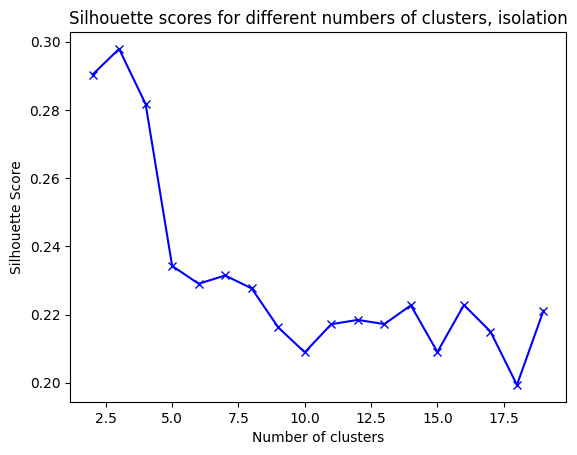

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

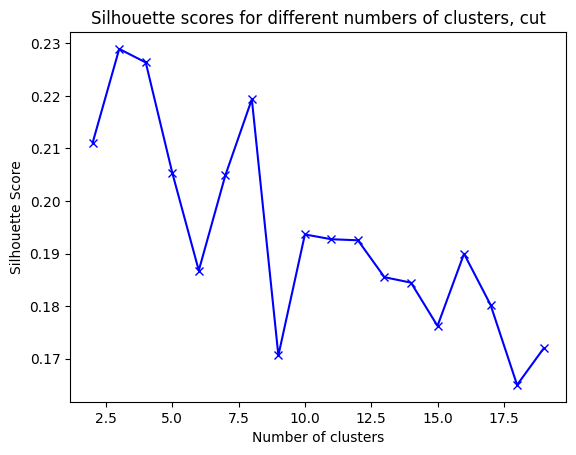

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

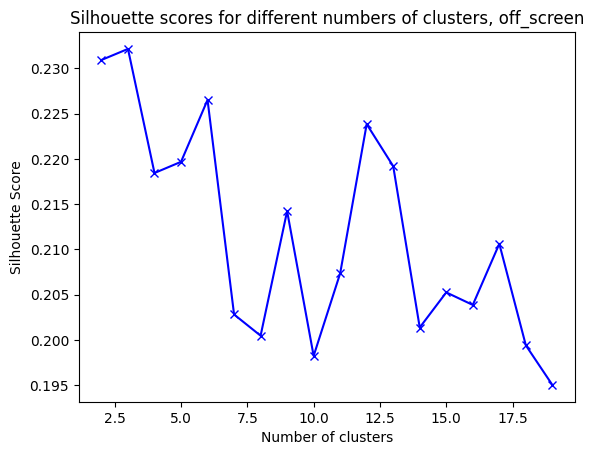

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

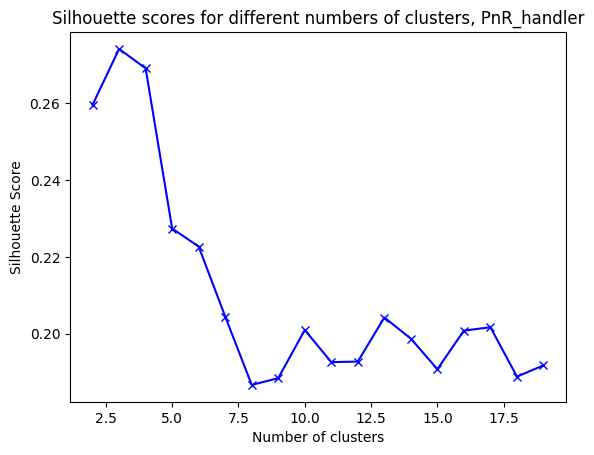

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

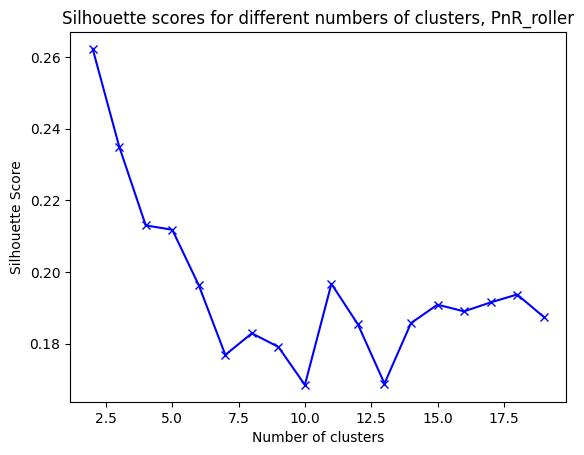

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

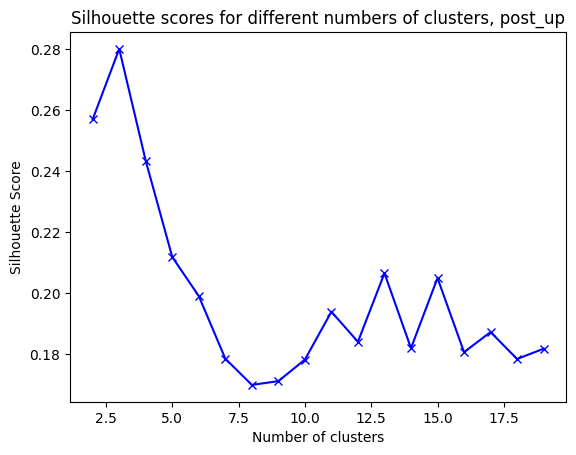

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

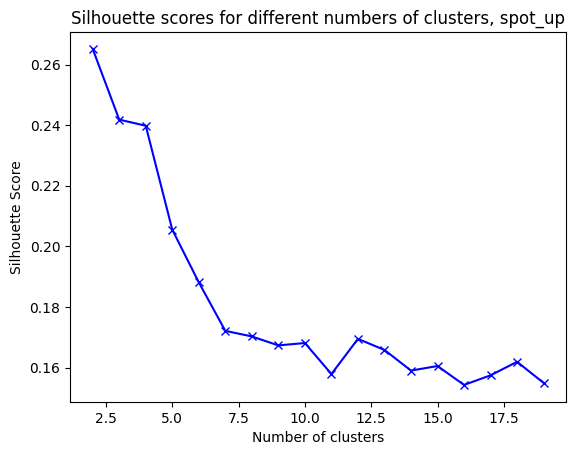

In [7]:
"""
Let's determine the optimal number of clusters via the silhouette method for each play type

"""
for key in normalized_data.keys():
    silhouette_avg = []
    for i in range(2, 20):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(normalized_data[key])
        cluster_labels = kmeans.labels_
    
        silhouette_avg.append(silhouette_score(normalized_data[key], cluster_labels))
    
    plt.plot(range(2, 20), silhouette_avg, 'bx-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette scores for different numbers of clusters, " + str(key))
    plt.show()

In [8]:
"""
Checking the maximums, we get the following cluster numbers.
"""
num_clusters = {
    "isolation": 3,
    "cut": 3,
    "off_screen":3,
    "PnR_handler": 3,
    "PnR_roller": 2,
    "post_up": 3,
    "spot_up": 2
}

In [9]:
#We can now start training the KMeans models.
models = {}
for key in normalized_data.keys():
    models[key] = KMeans(n_clusters=num_clusters[key])
    models[key].fit(normalized_data[key])

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

In [10]:
#Get the labels from KMeans clustering
labels_kmeans = {}
for key in models.keys():
    labels_kmeans[key] = pd.DataFrame(models[key].labels_)
    

In [11]:
"""
The data may not naturally cluster in a spherical manner, so let's try spectral clustering as well. 
We'll attempt two different methods for getting the affinity matrix, nearest neighbors and RBF. 
"""

"\nThe data may not naturally cluster in a spherical manner, so let's try spectral clustering as well. \nWe'll attempt two different methods for getting the affinity matrix, nearest neighbors and RBF. \n"

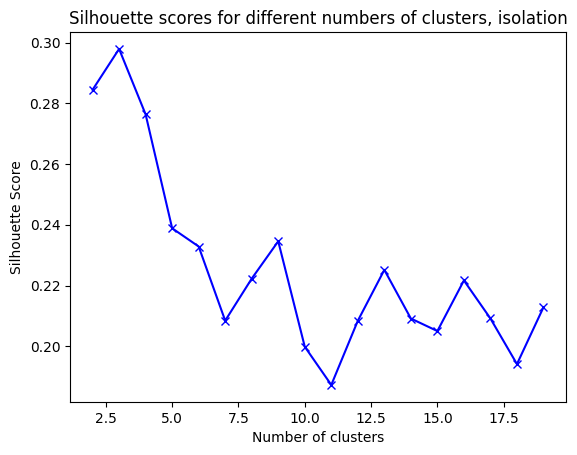

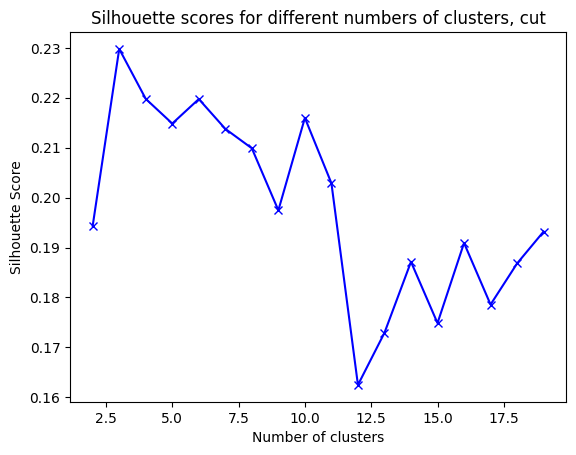

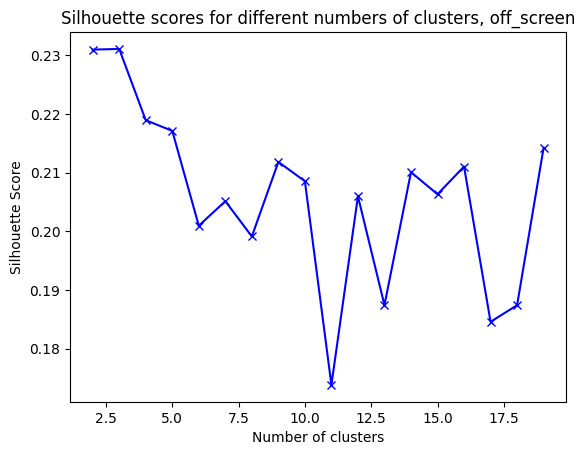

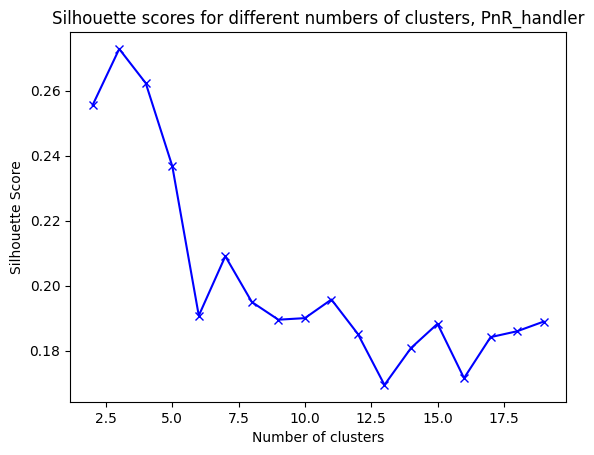

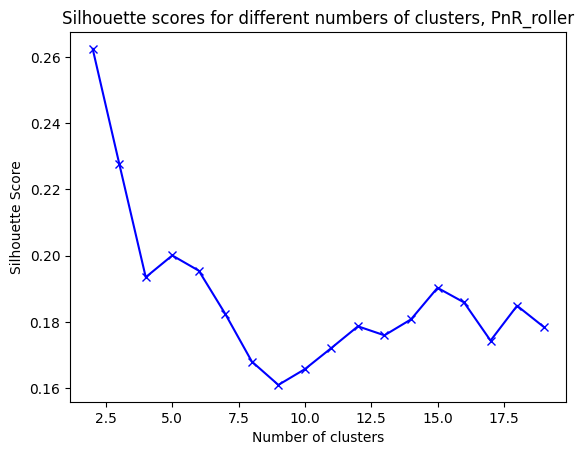

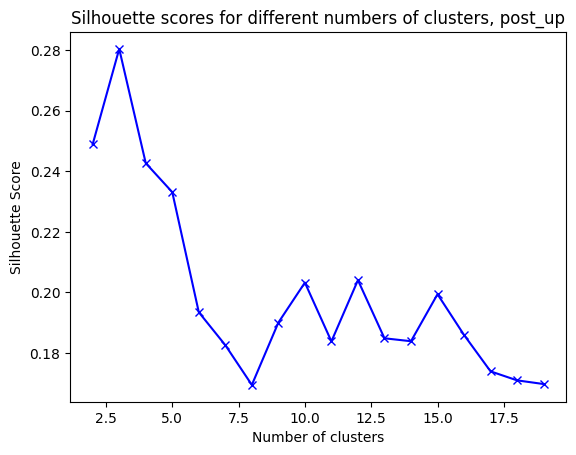

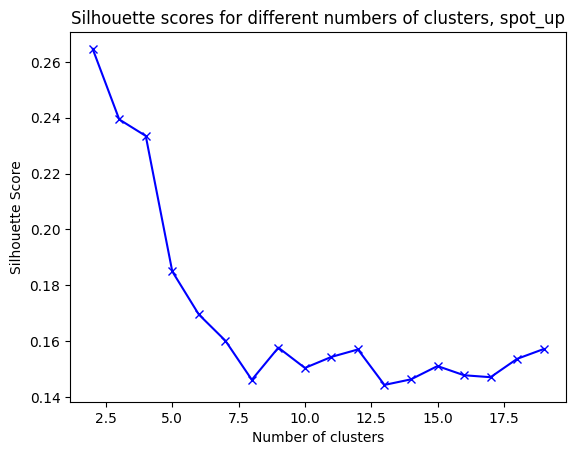

In [12]:
#First, determine the number of clusters via the silhouette scores
for key in normalized_data.keys():
    silhouette_avg = []
    for i in range(2, 20):
        spectral_model_rbf = SpectralClustering(n_clusters=i)
        spectral_model_rbf.fit(normalized_data[key])
        spectral_model_rbf_labels = spectral_model_rbf.labels_
    
        silhouette_avg.append(silhouette_score(normalized_data[key], spectral_model_rbf_labels))
    
    plt.plot(range(2, 20), silhouette_avg, 'bx-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette scores for different numbers of clusters, " + str(key))
    plt.show()

In [13]:
num_clusters_spectral = {
    "isolation": 3,
    "cut": 3,
    "off_screen": 3,
    "PnR_handler": 3,
    "PnR_roller": 2,
    "post_up": 3, 
    "spot_up": 2
}

In [14]:
#We can now start training the RBF spectral clustering models.
spectral_rbf_models = {}
for key in normalized_data.keys():
    spectral_rbf_models[key] = SpectralClustering(n_clusters=num_clusters_spectral[key], affinity="rbf")
    spectral_rbf_models[key].fit(normalized_data[key])

In [15]:
#Get the labels 
labels_rbf = {}
for key in spectral_rbf_models.keys():
    labels_rbf[key] = pd.DataFrame(spectral_rbf_models[key].labels_)
    

In [16]:
#Let's train the nearest neighbor models next
spectral_nn_models = {}
for key in normalized_data.keys():
    spectral_nn_models[key] = SpectralClustering(n_clusters=num_clusters_spectral[key], affinity="nearest_neighbors")
    spectral_nn_models[key].fit(normalized_data[key])

In [17]:
#Get the labels 
labels_nn = {}
for key in spectral_nn_models.keys():
    labels_nn[key] = pd.DataFrame(spectral_nn_models[key].labels_)
    

In [18]:
#Let's try to compute the Davies-Bouldin score for all these models. For each given type of model, we'll take the average over all play type models.
kmeans_scores = []
for key in models.keys():
    kmeans_scores.append(davies_bouldin_score(normalized_data[key], labels_kmeans[key].values.ravel()))
print("KMeans average: " + str(np.mean(kmeans_scores)))

rbf_scores = []
for key in spectral_rbf_models.keys():
    rbf_scores.append(davies_bouldin_score(normalized_data[key], labels_rbf[key].values.ravel()))
print("Spectral RBF average: " + str(np.mean(rbf_scores)))

nn_scores = []
for key in spectral_nn_models.keys():
    rbf_scores.append(davies_bouldin_score(normalized_data[key], labels_nn[key].values.ravel()))
print("Spectral NN average: " + str(np.mean(rbf_scores)))
            
    

KMeans average: 1.4146117599513188
Spectral RBF average: 1.408598028528355
Spectral NN average: 1.4190989824766584


<Axes: >

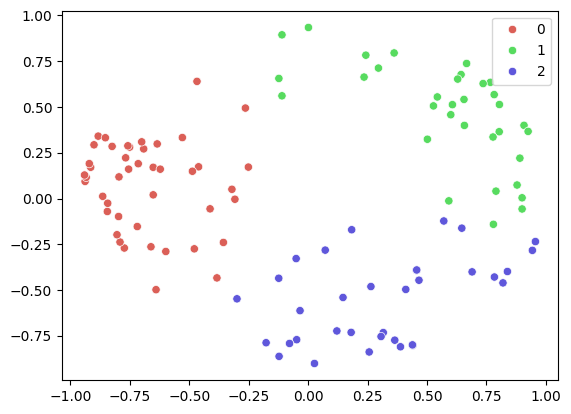

In [19]:
#Isolation scatterplot
pca = PCA(n_components=2)
pca_results = pca.fit_transform(normalized_data["isolation"])
sns.scatterplot(
    x=pca_results[:,0],
    y=pca_results[:,1],
    palette=sns.color_palette("hls", num_clusters["isolation"]),
    legend="full",
    hue=models["isolation"].labels_
)

<Axes: >

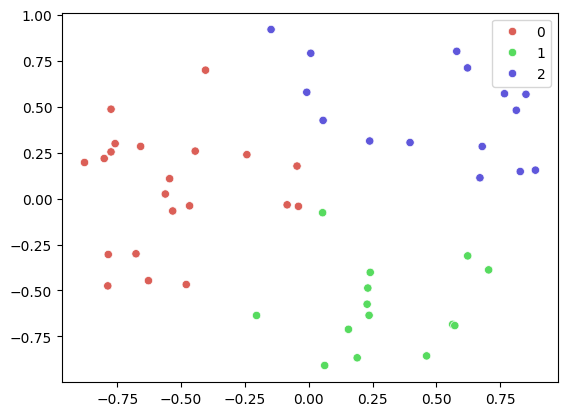

In [20]:
#Cut scatterplot.
pca = PCA(n_components=2)
pca_results = pca.fit_transform(normalized_data["cut"])
sns.scatterplot(
    x=pca_results[:,0],
    y=pca_results[:,1],
    palette=sns.color_palette("hls", num_clusters["cut"]),
    legend="full",
    hue=models["cut"].labels_
)

<Axes: >

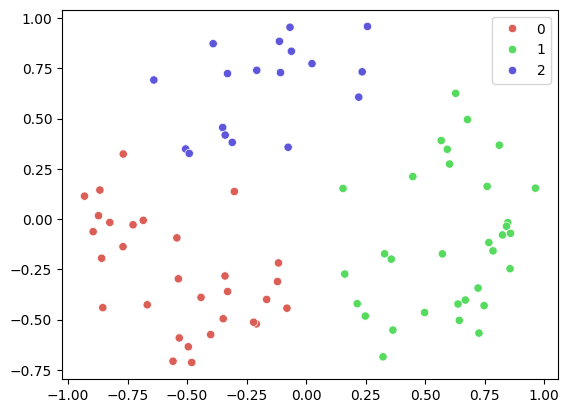

In [21]:
#off_screen
pca = PCA(n_components=2)
pca_results = pca.fit_transform(normalized_data["off_screen"])
sns.scatterplot(
    x=pca_results[:,0],
    y=pca_results[:,1],
    palette=sns.color_palette("hls", num_clusters["off_screen"]),
    legend="full",
    hue=models["off_screen"].labels_
)

<Axes: >

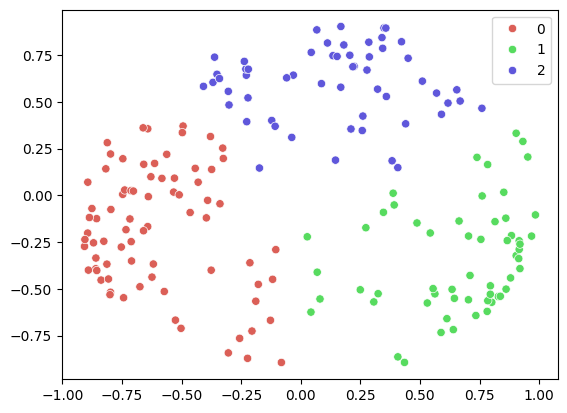

In [22]:
#Pick and roll ball handler
pca = PCA(n_components=2)
pca_results = pca.fit_transform(normalized_data["PnR_handler"])
sns.scatterplot(
    x=pca_results[:,0],
    y=pca_results[:,1],
    palette=sns.color_palette("hls", num_clusters["PnR_handler"]),
    legend="full",
    hue=models["PnR_handler"].labels_
)

<Axes: >

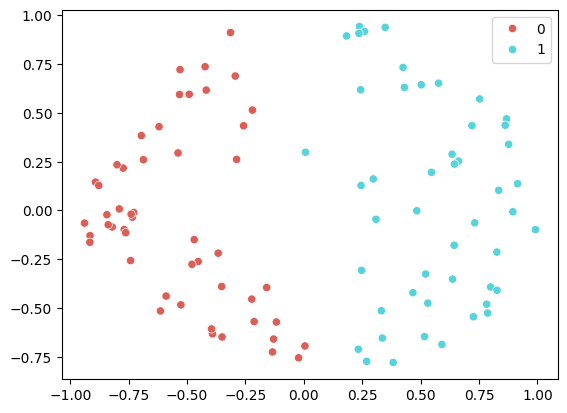

In [23]:
#Pick and roll roller
pca = PCA(n_components=2)
pca_results = pca.fit_transform(normalized_data["PnR_roller"])
sns.scatterplot(
    x=pca_results[:,0],
    y=pca_results[:,1],
    palette=sns.color_palette("hls", num_clusters["PnR_roller"]),
    legend="full",
    hue=models["PnR_roller"].labels_
)

<Axes: xlabel='Constant', ylabel='PPP_isolation'>

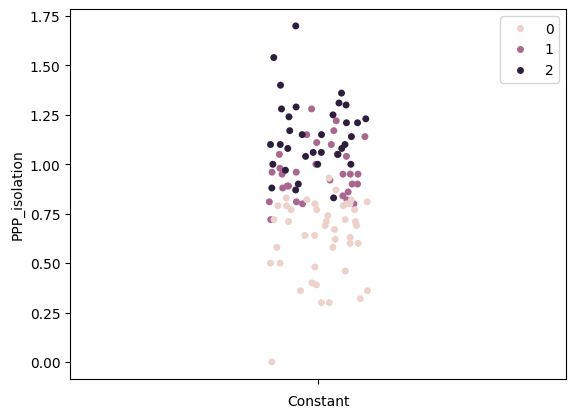

In [24]:
#Visualizing how clusters vary over specific stats. In this case, how isolation clusters vary over points per possession. 
iso_data_with_constant = raw_data["isolation"]
iso_data_with_constant["Constant"] = "" * len(iso_data_with_constant)
sns.stripplot(x=iso_data_with_constant['Constant'],y=iso_data_with_constant['PPP_isolation'],hue=models["isolation"].labels_,jitter=True)

<Axes: xlabel='Constant', ylabel='POSS_isolation'>

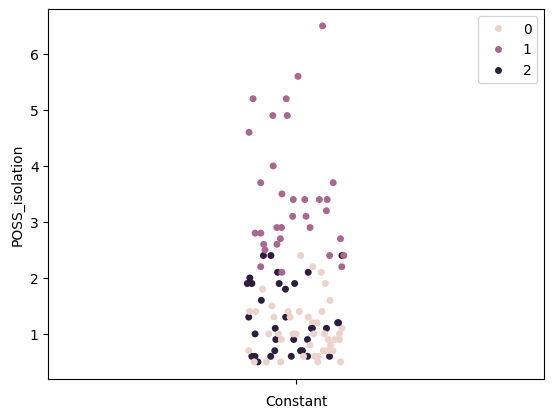

In [25]:
#Let's see how isolation clusters vary over average iso possessions per game. 
sns.stripplot(x=iso_data_with_constant['Constant'],y=iso_data_with_constant['POSS_isolation'],hue=models["isolation"].labels_,jitter=True)

In [27]:
#Let's join together the cluster labels, raw data, and player names to see what clusters each player belongs to. 
output = {}
for key in raw_data.keys():
    output[key] = raw_data[key]
    raw_data[key]["LABEL"] = models[key].labels_
    raw_data[key]["PLAYER"] = players[key]

In [30]:
#Let's see players who belong to cluster 0 in iso plays.
print(output["isolation"][output["isolation"]["LABEL"] == 0]["PLAYER"])

41              Kyle Kuzma
43           Jalen Brunson
45         Cade Cunningham
50          Darius Garland
51          Shaedon Sharpe
52            Desmond Bane
55           Tobias Harris
59            Franz Wagner
62             LaMelo Ball
63       Immanuel Quickley
64         Dennis Schroder
65          Reggie Jackson
71         De'Andre Hunter
74            Cole Anthony
75              Chris Paul
76            Aaron Gordon
77            Jordan Poole
78          Scottie Barnes
82         Lauri Markkanen
86              Malik Monk
87           Fred VanVleet
88     Talen Horton-Tucker
90          Andrew Wiggins
91             Jaden Hardy
92           Kyle Anderson
93              Coby White
94            Jamal Murray
95           Jeremy Sochan
96             CJ McCollum
97       De'Anthony Melton
98          Gary Trent Jr.
99            Bones Hyland
100          Collin Sexton
101         Gordon Hayward
102       Dennis Smith Jr.
103          Marcus Sasser
104        Scoot Henderson
1

In [31]:
#Now let's see players who belong to cluster 1 in iso plays.
print(output["isolation"][output["isolation"]["LABEL"] == 1]["PLAYER"])

1                 Luka Doncic
2                Jayson Tatum
3     Shai Gilgeous-Alexander
4                Kevin Durant
5                 Joel Embiid
6             Zion Williamson
7               Kawhi Leonard
8                 Paul George
9              Paolo Banchero
10               De'Aaron Fox
11          Spencer Dinwiddie
12             Damian Lillard
13               Kyrie Irving
14      Giannis Antetokounmpo
16                 Trae Young
17            Anthony Edwards
18                 Cam Thomas
19               Jimmy Butler
21               James Harden
23             Brandon Ingram
25               LeBron James
26                Zach LaVine
27              DeMar DeRozan
29            Jordan Clarkson
30         Karl-Anthony Towns
32               Tyrese Maxey
33               Jerami Grant
35              Julius Randle
36              Mikal Bridges
38               Devin Booker
39               Jaylen Brown
44          Russell Westbrook
47               Terry Rozier
Name: PLAY

In [32]:
#Now cluster 2
print(output["isolation"][output["isolation"]["LABEL"] == 2]["PLAYER"])

15       Dejounte Murray
20     Jaren Jackson Jr.
22     Tyrese Haliburton
24         Stephen Curry
28           Bam Adebayo
31          Nikola Jokic
34           Jalen Green
37         Pascal Siakam
40       Malcolm Brogdon
42      Donovan Mitchell
46         Anthony Davis
48     Victor Wembanyama
49      D'Angelo Russell
53        Jalen Williams
54          Caris LeVert
56           Bruce Brown
57         Miles Bridges
58    Bennedict Mathurin
60       Khris Middleton
61         Austin Reaves
66      Tim Hardaway Jr.
67            Jaden Ivey
68         Chet Holmgren
69        Alperen Sengun
70          Jrue Holiday
72      Lonnie Walker IV
73           Evan Mobley
79          Zach Collins
80           Jalen Suggs
81         Rui Hachimura
83      Domantas Sabonis
84         Killian Hayes
85      Jaime Jaquez Jr.
89         Devin Vassell
Name: PLAYER, dtype: object
